# 1. Setup and Load Data

In [1]:
import tensorflow as tf
import os

In [2]:
import cv2
import imghdr

In [3]:
data_dir = "data"

In [4]:
os.listdir(os.path.join(data_dir,'happy'))

['05-12-21-happy-people.jpg',
 '1000_F_165246984_Ihe5LVattiq8zEPivcPqrtM85x7noWJw.jpg',
 '1000_F_176864699_2rY3V6rmOJ2EexazQGd1NnOnCherr6Sk.jpg',
 '1000_F_257759165_m9yldegJvu8gPi8lOHDM0mwP8LejhmKK.jpg',
 '1000_F_42220133_toAU6USGY9jVr2XJFLssfG00cSYIJ173.jpg',
 '110754-utyeqqosky-1547658396.jpeg',
 '16490402-happy-people-business-team-gruppe-zusammen-isoliert-auf-weiC39Fem-hintergrund.jpg',
 '170404-happy-workers-feature.jpg',
 '1HEoLBLidT2u4mhJ0oiDgig.png',
 '1zgJ8mDXVYwNY_5KkZr9Wzw.jpeg',
 '2560px-Happy_People.jpg',
 '3253790.jpg',
 '35438_hd.jpg',
 '56f455011e0000b300705475.jpeg',
 '61F6Z3QnR0L._AC_UF8941000_QL80_.jpg',
 '61UPOjbFHpL._AC_UF10001000_QL80_.jpg',
 '64422110f8f24426622a181501083f363c4f1e14230ebc6a08b8de01c9f51a3f.jpg',
 '8e06de1bf2171da2312b6de61c61e4bc.jpg',
 '9b65a25adca61c48bcb01370116723e3.jpg',
 'A_Sep20_14_1189155141.jpg',
 'business-people-succesful-celebrating-group-successful-39416686-800x500.jpg',
 'compassion-900x387.jpg',
 'csm_happy-people-geschaeftsfuehrer

In [5]:
image_exts = ['jpeg','jpg','bmp','png']

In [6]:
image_exts

['jpeg', 'jpg', 'bmp', 'png']

In [7]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir,image_class)):
        image_path = os.path.join(data_dir,image_class,image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print(f'Image not in ext list {image_path}')
                os.remove(image_path)
        except Exception as e:
            print(f'Issue with image {image_path}')
            

Image not in ext list data\happy\2560px-Happy_People.jpg
Image not in ext list data\happy\depositphotos_391577690-stock-photo-cheerful-woman-outstretched-hands-sitting.jpg
Image not in ext list data\happy\guilherme-stecanella-375176-unsplash.jpg
Image not in ext list data\happy\Happy20People.jpg
Image not in ext list data\happy\how-to-watch-shiny-happy-people-64a2f8ea7dc3014582658-900.webp
Image not in ext list data\happy\traitshappypeople.jpg
Image not in ext list data\sad\1cd95b44e0d785987a6596d4baf940fc19-13-sad-white-man.2x.h473.w710.jpg
Image not in ext list data\sad\depositphotos_19568511-stock-photo-teenage-girl-looking-thoughtful-about.jpg
Image not in ext list data\sad\depositphotos_210655610-stock-photo-sad-man-sitting-floor-home.jpg
Image not in ext list data\sad\depressed-woman-sitting-alone-on-600nw-2184735157.jpg
Image not in ext list data\sad\portrait-sad-man-600nw-126009806.jpg
Image not in ext list data\sad\sad-man-pictures-kjxgtb0t0ijlimlj.jpg
Image not in ext list da

In [8]:
import numpy as np
from matplotlib import pyplot as plt

In [9]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 270 files belonging to 2 classes.


In [10]:
data_iterator = data.as_numpy_iterator()

In [11]:
data_iterator

In [15]:
batch = data_iterator.next()


In [16]:
len(batch)

2

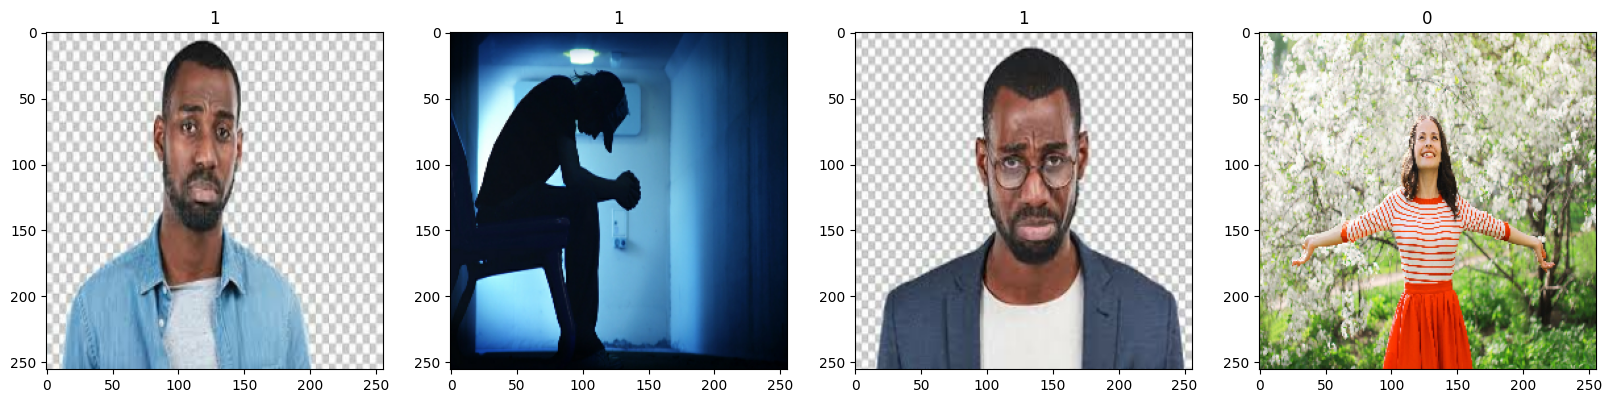

In [17]:
fig,ax = plt.subplots(ncols=4,figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [18]:
batch[1]

array([1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 1])

# 2. Preprocess Data

In [19]:
data = data.map(lambda x,y: (x/255, y))

In [20]:
data.as_numpy_iterator().next()[0].max()

1.0

In [21]:
len(data)

9

In [22]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)+1

In [23]:
train_size,val_size,test_size

(6, 1, 1)

In [24]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [25]:
len(train)

6

# 3. Deep Model

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten

In [27]:
model = Sequential()

In [28]:
model.add(Conv2D(16,(3,3),1,activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3),1,activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16,(3,3),1,activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [29]:
model.compile('adam',loss=tf.losses.BinaryCrossentropy(),metrics=['accuracy'])

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

In [31]:
logdir='logs'

In [32]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [33]:
hist = model.fit(train,epochs=20,validation_data=val,callbacks=[tensorboard_callback])

Epoch 1/20
6/6 [==============================] - 4s 574ms/step - loss: 0.8716 - accuracy: 0.5208 - val_loss: 0.6403 - val_accuracy: 0.5938
Epoch 2/20
6/6 [==============================] - 3s 515ms/step - loss: 0.5959 - accuracy: 0.6146 - val_loss: 0.5619 - val_accuracy: 0.7500
Epoch 3/20
6/6 [==============================] - 4s 522ms/step - loss: 0.5545 - accuracy: 0.7604 - val_loss: 0.7464 - val_accuracy: 0.5000
Epoch 4/20
6/6 [==============================] - 4s 538ms/step - loss: 0.4784 - accuracy: 0.7865 - val_loss: 0.3904 - val_accuracy: 0.8125
Epoch 5/20
6/6 [==============================] - 4s 540ms/step - loss: 0.4618 - accuracy: 0.7917 - val_loss: 0.5284 - val_accuracy: 0.7812
Epoch 6/20
6/6 [==============================] - 4s 523ms/step - loss: 0.3685 - accuracy: 0.9010 - val_loss: 0.3542 - val_accuracy: 0.8125
Epoch 7/20
6/6 [==============================] - 4s 527ms/step - loss: 0.3365 - accuracy: 0.8438 - val_loss: 0.2815 - val_accuracy: 0.9062
Epoch 8/20
6/6 [====

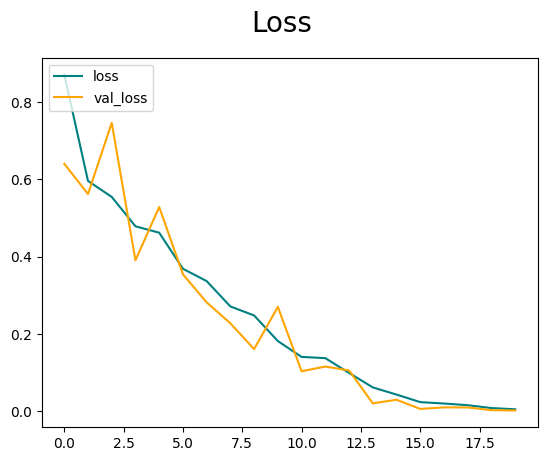

In [34]:
fig = plt.figure()
plt.plot(hist.history['loss'],color='teal',label='loss')
plt.plot(hist.history['val_loss'],color='orange',label='val_loss')
fig.suptitle('Loss',fontsize=20)
plt.legend(loc="upper left")
plt.show()

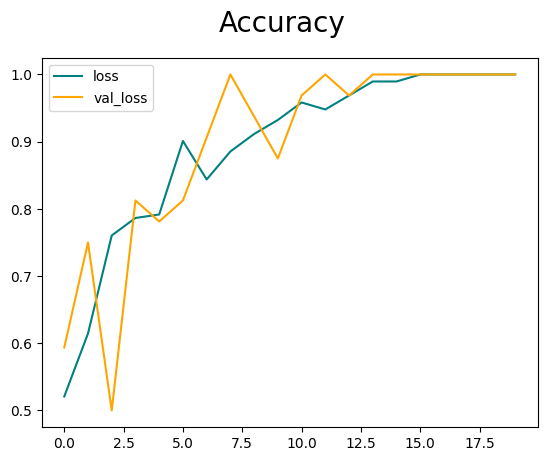

In [35]:
fig = plt.figure()
plt.plot(hist.history['accuracy'],color='teal',label='loss')
plt.plot(hist.history['val_accuracy'],color='orange',label='val_loss')
fig.suptitle('Accuracy',fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 4. Evaluate Performance

In [36]:
from tensorflow.keras.metrics import Precision,Recall,BinaryAccuracy

In [37]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [38]:
for batch in test.as_numpy_iterator():
    X,y=batch
    yhat = model.predict(X)
    pre.update_state(y,yhat)
    re.update_state(y,yhat)
    acc.update_state(y,yhat)

1/1 [==============================] - 0s 149ms/step


In [39]:
print(f'Precison:{pre.result().numpy()},Recall:{re.result().numpy()},Accuracy:{acc.result().numpy()}')

Precison:1.0,Recall:1.0,Accuracy:1.0


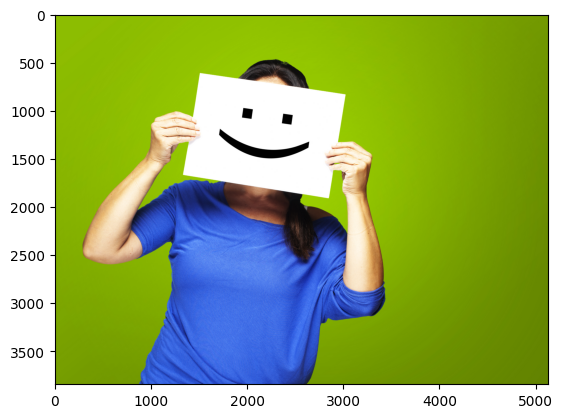

In [71]:
img=cv2.imread('happytest.jpg')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

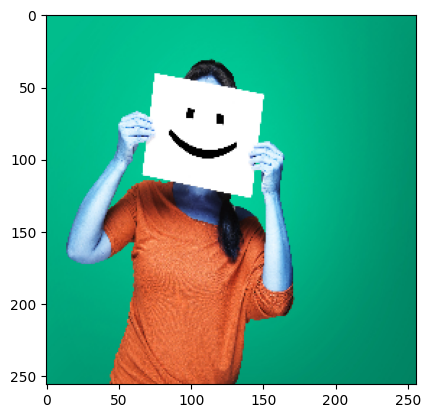

In [72]:
resize = tf.image.resize(img,(256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [73]:
yhat = model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 19ms/step


In [74]:
yhat

array([[2.3404601e-07]], dtype=float32)

In [75]:
if yhat>0.5:
    print(f'predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Happy


# 5. Save the model

In [77]:
from tensorflow.keras.models import load_model

In [79]:
model.save(os.path.join('models','happysadmodel.h5'))

In [80]:
new_model = load_model(os.path.join('models','happysadmodel.h5'))

In [82]:
yhatnew=new_model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 58ms/step


In [83]:
if yhatnew>0.5:
    print(f'predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Happy
